In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [10]:
# Small datasets can be added to the project directly and imported by referring to the file name
df = pd.read_csv("https://raw.githubusercontent.com/IBM-Cloud/ml-iris-classification/master/data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
print(df.shape)
print(df.columns)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [11]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [ ]:
df.describe()

<AxesSubplot:>

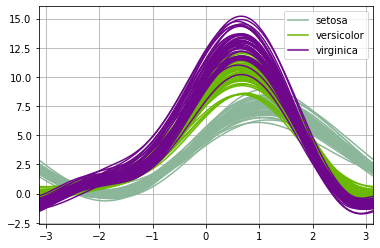

In [12]:
%matplotlib inline
from pandas.plotting import andrews_curves

andrews_curves(df, 'species')

In [14]:
X = df.drop(columns='species')
y = df.species

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [15]:

print(x_train.count())
print(x_test.count())


sepal_length    120
sepal_width     120
petal_length    120
petal_width     120
dtype: int64
sepal_length    30
sepal_width     30
petal_length    30
petal_width     30
dtype: int64


In [16]:
print(y_train.count())
print(y_test.count())

120
30


In [17]:
rfc = RandomForestClassifier(random_state=3)
param_grid = { 
              'n_estimators': np.arange(50, 350, 50),
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : np.arange(4,11,1)
             }
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=2, n_jobs=-1)
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': array([4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([100, 150, 200, 250])},
             verbose=2)

In [18]:
CV_rfc.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

In [19]:
rfc1=RandomForestClassifier(max_depth= 5, max_features= 'auto', n_estimators= 100 ,random_state=3)

In [20]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=3)

In [21]:
pred=rfc1.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9666666666666667
